### Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import datetime as dt
import re

#### Functions

In [2]:
def http_request_type(request_string):
    '''http_request_type(request_string) request_string is a text value. 
    Function is used for extracting request type from request column as GET or HEAD'''
    pattern = r"^(\w+)\s"
    match = re.match(pattern, request_string)
    result = match.group(1)
    return result

In [3]:
def product_extract(request_string):
    '''http_request_type(request_string) request_string is a text value. 
    Function is used for extracting product name from request column.'''
    pattern = r"\w+\s/downloads/(.*?)\sHTTP"
    #result = re.findall(pattern, request_string)
    match = re.match(pattern, request_string)
    result = match.group(1)    
    return result

In [4]:
def brand_extract(request_string):
    '''http_request_type(request_string) request_string is a text value. 
    Function is used for extracting product brand name from request column.'''
    pattern = r"\w+\s/downloads/(\w+)-(.*?)\sHTTP"
    #result = re.findall(pattern, request_string)
    match = re.match(pattern, request_string)
    result = match.group(1)    
    return result

In [5]:
def model_extract(request_string):
    '''http_request_type(request_string) request_string is a text value. 
    Function is used for extracting product model from request column.'''
    pattern = r"\w+\s/downloads/(\w+)-(.*?)\sHTTP"
    #result = re.findall(pattern, request_string)
    match = re.match(pattern, request_string)
    result = match.group(2)    
    return result

In [6]:
def product_year_extract(request_string):
    '''http_request_type(request_string) request_string is a text value. 
    Function is used for extracting product year from request column.'''
    pattern = r"\w+\s/downloads/(\w+)-(.*?)-?(\d{4})?\sHTTP"
    #result = re.findall(pattern, request_string)
    match = re.match(pattern, request_string)
    result = match.group(3)
    if result:
        result = result
    else:
        result = "empty"    
    return result

#### Read Data And Convert Time

In [7]:
df = pd.read_json(r"C:\Users\Ertuğrul\Downloads\updated_dataset.json", lines=True)
df.sample(30)

,time,remote_ip,remote_user,request,response,bytes,referrer,agent
37583,30/May/2015:10:05:47 +0000,92.243.16.24,-,GET /downloads/michelin-alpin-5-zp-n0-295-45-r...,404,328,-,Debian APT-HTTP/1.3 (0.9.7.9)
1309,17/May/2015:18:05:16 +0000,204.77.168.241,-,GET /downloads/michelin-alpin-5-zp-n0-295-45-r...,304,0,-,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.7)
7071,19/May/2015:19:05:27 +0000,137.208.8.164,-,GET /downloads/michelin-alpin-5-zp-n0-295-45-r...,304,0,-,Debian APT-HTTP/1.3 (0.9.7.9)
50773,04/Jun/2015:01:06:38 +0000,192.73.240.106,-,GET /downloads/bridgestone-weather-control-a00...,404,336,-,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)
21713,24/May/2015:21:05:58 +0000,10.16.64.17,-,GET /downloads/michelin-alpin-5-rft-n0-205-55-...,304,0,-,Debian APT-HTTP/1.3 (1.0.1ubuntu2)
38937,30/May/2015:22:05:53 +0000,195.82.85.92,-,GET /downloads/hankook-kinergy-4s-h740-205-55-...,404,338,-,Debian APT-HTTP/1.3 (0.9.7.9)
34301,29/May/2015:06:05:47 +0000,94.242.58.169,-,GET /downloads/pirelli-cinturato-p7-all-season...,404,338,-,Debian APT-HTTP/1.3 (0.9.7.9)
10810,21/May/2015:02:05:54 +0000,66.113.104.99,-,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,200,1768,-,Wget/1.15 (linux-gnu)
49138,03/Jun/2015:11:06:02 +0000,180.179.174.219,-,GET /downloads/bridgestone-turanza-er300-275-4...,304,0,-,Debian APT-HTTP/1.3 (0.9.7.9)
50074,03/Jun/2015:19:06:23 +0000,84.208.15.12,-,GET /downloads/gislaved-ultra-speed-2-215-55-r...,304,0,-,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51462 entries, 0 to 51461
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   time         51462 non-null  object
 1   remote_ip    51462 non-null  object
 2   remote_user  51462 non-null  object
 3   request      51462 non-null  object
 4   response     51462 non-null  int64 
 5   bytes        51462 non-null  int64 
 6   referrer     51462 non-null  object
 7   agent        51462 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.1+ MB


In [9]:
df['time'] = pd.to_datetime(df['time'], format='%d/%b/%Y:%H:%M:%S %z')  # object datetime convert
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51462 entries, 0 to 51461
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   time         51462 non-null  datetime64[ns, UTC]
 1   remote_ip    51462 non-null  object             
 2   remote_user  51462 non-null  object             
 3   request      51462 non-null  object             
 4   response     51462 non-null  int64              
 5   bytes        51462 non-null  int64              
 6   referrer     51462 non-null  object             
 7   agent        51462 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 3.1+ MB


In [10]:
#df['time'] = df['time'].apply(lambda d: pd.to_datetime(d).date())  # remove time
df['time'] = df['time'].dt.tz_localize(None)  # remove timezone because of excel that is not support
df["year"] = df["time"].dt.year
df["month"] = df["time"].dt.month
df["day"] = df["time"].dt.day
df["hour"] = df["time"].dt.hour
df["minute"] = df["time"].dt.minute
df

,time,remote_ip,remote_user,request,response,bytes,referrer,agent,year,month,day,hour,minute
0,2015-05-17 08:05:32,93.180.71.3,-,GET /downloads/gislaved-ultra-speed-2-215-55-r...,304,0,-,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21),2015,5,17,8,5
1,2015-05-17 08:05:23,93.180.71.3,-,GET /downloads/bridgestone-turanza-er300-275-4...,304,0,-,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21),2015,5,17,8,5
2,2015-05-17 08:05:24,80.91.33.133,-,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,304,0,-,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.17),2015,5,17,8,5
3,2015-05-17 08:05:34,217.168.17.5,-,GET /downloads/bridgestone-turanza-er300-rft-2...,200,490,-,Debian APT-HTTP/1.3 (0.8.10.3),2015,5,17,8,5
4,2015-05-17 08:05:09,217.168.17.5,-,GET /downloads/pirelli-scorpion-sealinside-ao-...,200,490,-,Debian APT-HTTP/1.3 (0.8.10.3),2015,5,17,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51457,2015-06-04 07:06:04,173.255.199.22,-,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,404,339,-,Debian APT-HTTP/1.3 (0.8.10.3),2015,6,4,7,6
51458,2015-06-04 07:06:05,54.186.10.255,-,GET /downloads/michelin-alpin-5-zp-n0-225-45-r...,200,2582,-,urlgrabber/3.9.1 yum/3.4.3,2015,6,4,7,6
51459,2015-06-04 07:06:16,80.91.33.133,-,GET /downloads/pirelli-scorpion-sealinside-ao-...,304,0,-,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.16),2015,6,4,7,6
51460,2015-06-04 07:06:05,144.76.151.58,-,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,304,0,-,Debian APT-HTTP/1.3 (0.9.7.9),2015,6,4,7,6


In [11]:
df.drop(["remote_user","referrer"], axis=1, inplace=True)  # because of empty data
df

,time,remote_ip,request,response,bytes,agent,year,month,day,hour,minute
0,2015-05-17 08:05:32,93.180.71.3,GET /downloads/gislaved-ultra-speed-2-215-55-r...,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21),2015,5,17,8,5
1,2015-05-17 08:05:23,93.180.71.3,GET /downloads/bridgestone-turanza-er300-275-4...,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21),2015,5,17,8,5
2,2015-05-17 08:05:24,80.91.33.133,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.17),2015,5,17,8,5
3,2015-05-17 08:05:34,217.168.17.5,GET /downloads/bridgestone-turanza-er300-rft-2...,200,490,Debian APT-HTTP/1.3 (0.8.10.3),2015,5,17,8,5
4,2015-05-17 08:05:09,217.168.17.5,GET /downloads/pirelli-scorpion-sealinside-ao-...,200,490,Debian APT-HTTP/1.3 (0.8.10.3),2015,5,17,8,5
...,...,...,...,...,...,...,...,...,...,...,...
51457,2015-06-04 07:06:04,173.255.199.22,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,404,339,Debian APT-HTTP/1.3 (0.8.10.3),2015,6,4,7,6
51458,2015-06-04 07:06:05,54.186.10.255,GET /downloads/michelin-alpin-5-zp-n0-225-45-r...,200,2582,urlgrabber/3.9.1 yum/3.4.3,2015,6,4,7,6
51459,2015-06-04 07:06:16,80.91.33.133,GET /downloads/pirelli-scorpion-sealinside-ao-...,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.16),2015,6,4,7,6
51460,2015-06-04 07:06:05,144.76.151.58,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,304,0,Debian APT-HTTP/1.3 (0.9.7.9),2015,6,4,7,6


In [12]:
df["request_type"] = df["request"].apply(lambda x: http_request_type(x))
df["product"] = df["request"].apply(lambda x: product_extract(x))
df["product_brand"] = df["request"].apply(lambda x: brand_extract(x))
df["product_model"] = df["request"].apply(lambda x: model_extract(x))
df["product_year"] = df["request"].apply(lambda x: product_year_extract(x))
df

,time,remote_ip,request,response,bytes,agent,year,month,day,hour,minute,request_type,product,product_brand,product_model,product_year
0,2015-05-17 08:05:32,93.180.71.3,GET /downloads/gislaved-ultra-speed-2-215-55-r...,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21),2015,5,17,8,5,GET,gislaved-ultra-speed-2-215-55-r17-98w-xl-2023,gislaved,ultra-speed-2-215-55-r17-98w-xl-2023,2023
1,2015-05-17 08:05:23,93.180.71.3,GET /downloads/bridgestone-turanza-er300-275-4...,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21),2015,5,17,8,5,GET,bridgestone-turanza-er300-275-45-r19-109w-2023,bridgestone,turanza-er300-275-45-r19-109w-2023,2023
2,2015-05-17 08:05:24,80.91.33.133,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.17),2015,5,17,8,5,GET,kumho-ecsta-ps71-215-45-zr18-93y-xl-2022,kumho,ecsta-ps71-215-45-zr18-93y-xl-2022,2022
3,2015-05-17 08:05:34,217.168.17.5,GET /downloads/bridgestone-turanza-er300-rft-2...,200,490,Debian APT-HTTP/1.3 (0.8.10.3),2015,5,17,8,5,GET,bridgestone-turanza-er300-rft-205-55-r16-91w-2023,bridgestone,turanza-er300-rft-205-55-r16-91w-2023,2023
4,2015-05-17 08:05:09,217.168.17.5,GET /downloads/pirelli-scorpion-sealinside-ao-...,200,490,Debian APT-HTTP/1.3 (0.8.10.3),2015,5,17,8,5,GET,pirelli-scorpion-sealinside-ao-235-45-r21-101t...,pirelli,scorpion-sealinside-ao-235-45-r21-101t-xl-elec...,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51457,2015-06-04 07:06:04,173.255.199.22,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,404,339,Debian APT-HTTP/1.3 (0.8.10.3),2015,6,4,7,6,GET,kumho-ecsta-ps71-215-45-zr18-93y-xl-2022,kumho,ecsta-ps71-215-45-zr18-93y-xl-2022,2022
51458,2015-06-04 07:06:05,54.186.10.255,GET /downloads/michelin-alpin-5-zp-n0-225-45-r...,200,2582,urlgrabber/3.9.1 yum/3.4.3,2015,6,4,7,6,GET,michelin-alpin-5-zp-n0-225-45-r17-91v-xl-2023,michelin,alpin-5-zp-n0-225-45-r17-91v-xl-2023,2023
51459,2015-06-04 07:06:16,80.91.33.133,GET /downloads/pirelli-scorpion-sealinside-ao-...,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.16),2015,6,4,7,6,GET,pirelli-scorpion-sealinside-ao-235-45-r21-101t...,pirelli,scorpion-sealinside-ao-235-45-r21-101t-xl-elec...,2022
51460,2015-06-04 07:06:05,144.76.151.58,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,304,0,Debian APT-HTTP/1.3 (0.9.7.9),2015,6,4,7,6,GET,kumho-ecsta-ps71-215-45-zr18-93y-xl-2022,kumho,ecsta-ps71-215-45-zr18-93y-xl-2022,2022


In [13]:
df.columns

Index(['time', 'remote_ip', 'request', 'response', 'bytes', 'agent', 'year',
       'month', 'day', 'hour', 'minute', 'request_type', 'product',
       'product_brand', 'product_model', 'product_year'],
      dtype='object')

In [14]:
df1 = df[["time","year","month","day","hour","minute","remote_ip","request_type","product","product_brand","product_model","product_year","response","bytes","agent"]]  # Used for Python notebook analysis
df2 = df[["time","remote_ip","request_type","product_brand","product_model","product_year","response","bytes","agent"]]  # Use for Tableau analysis

In [15]:
df1.head(5)

,time,year,month,day,hour,minute,remote_ip,request_type,product,product_brand,product_model,product_year,response,bytes,agent
0,2015-05-17 08:05:32,2015,5,17,8,5,93.180.71.3,GET,gislaved-ultra-speed-2-215-55-r17-98w-xl-2023,gislaved,ultra-speed-2-215-55-r17-98w-xl-2023,2023,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)
1,2015-05-17 08:05:23,2015,5,17,8,5,93.180.71.3,GET,bridgestone-turanza-er300-275-45-r19-109w-2023,bridgestone,turanza-er300-275-45-r19-109w-2023,2023,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)
2,2015-05-17 08:05:24,2015,5,17,8,5,80.91.33.133,GET,kumho-ecsta-ps71-215-45-zr18-93y-xl-2022,kumho,ecsta-ps71-215-45-zr18-93y-xl-2022,2022,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.17)
3,2015-05-17 08:05:34,2015,5,17,8,5,217.168.17.5,GET,bridgestone-turanza-er300-rft-205-55-r16-91w-2023,bridgestone,turanza-er300-rft-205-55-r16-91w-2023,2023,200,490,Debian APT-HTTP/1.3 (0.8.10.3)
4,2015-05-17 08:05:09,2015,5,17,8,5,217.168.17.5,GET,pirelli-scorpion-sealinside-ao-235-45-r21-101t...,pirelli,scorpion-sealinside-ao-235-45-r21-101t-xl-elec...,2022,200,490,Debian APT-HTTP/1.3 (0.8.10.3)


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51462 entries, 0 to 51461
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   time           51462 non-null  datetime64[ns]
 1   year           51462 non-null  int64         
 2   month          51462 non-null  int64         
 3   day            51462 non-null  int64         
 4   hour           51462 non-null  int64         
 5   minute         51462 non-null  int64         
 6   remote_ip      51462 non-null  object        
 7   request_type   51462 non-null  object        
 8   product        51462 non-null  object        
 9   product_brand  51462 non-null  object        
 10  product_model  51462 non-null  object        
 11  product_year   51462 non-null  object        
 12  response       51462 non-null  int64         
 13  bytes          51462 non-null  int64         
 14  agent          51462 non-null  object        
dtypes: datetime64[ns](1

In [17]:
df2.head(5)

,time,remote_ip,request_type,product_brand,product_model,product_year,response,bytes,agent
0,2015-05-17 08:05:32,93.180.71.3,GET,gislaved,ultra-speed-2-215-55-r17-98w-xl-2023,2023,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)
1,2015-05-17 08:05:23,93.180.71.3,GET,bridgestone,turanza-er300-275-45-r19-109w-2023,2023,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)
2,2015-05-17 08:05:24,80.91.33.133,GET,kumho,ecsta-ps71-215-45-zr18-93y-xl-2022,2022,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.17)
3,2015-05-17 08:05:34,217.168.17.5,GET,bridgestone,turanza-er300-rft-205-55-r16-91w-2023,2023,200,490,Debian APT-HTTP/1.3 (0.8.10.3)
4,2015-05-17 08:05:09,217.168.17.5,GET,pirelli,scorpion-sealinside-ao-235-45-r21-101t-xl-elec...,2022,200,490,Debian APT-HTTP/1.3 (0.8.10.3)


In [18]:
#df1.to_excel(r"C:\Users\Ertuğrul\Downloads\Modified_Dataset_For_Python.xlsx", index=False)
#df2.to_excel(r"C:\Users\Ertuğrul\Downloads\Modified_Dataset_For_Tableau.xlsx", index=False)

#### Unique Users

In [19]:
df1.head(5)

,time,year,month,day,hour,minute,remote_ip,request_type,product,product_brand,product_model,product_year,response,bytes,agent
0,2015-05-17 08:05:32,2015,5,17,8,5,93.180.71.3,GET,gislaved-ultra-speed-2-215-55-r17-98w-xl-2023,gislaved,ultra-speed-2-215-55-r17-98w-xl-2023,2023,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)
1,2015-05-17 08:05:23,2015,5,17,8,5,93.180.71.3,GET,bridgestone-turanza-er300-275-45-r19-109w-2023,bridgestone,turanza-er300-275-45-r19-109w-2023,2023,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)
2,2015-05-17 08:05:24,2015,5,17,8,5,80.91.33.133,GET,kumho-ecsta-ps71-215-45-zr18-93y-xl-2022,kumho,ecsta-ps71-215-45-zr18-93y-xl-2022,2022,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.17)
3,2015-05-17 08:05:34,2015,5,17,8,5,217.168.17.5,GET,bridgestone-turanza-er300-rft-205-55-r16-91w-2023,bridgestone,turanza-er300-rft-205-55-r16-91w-2023,2023,200,490,Debian APT-HTTP/1.3 (0.8.10.3)
4,2015-05-17 08:05:09,2015,5,17,8,5,217.168.17.5,GET,pirelli-scorpion-sealinside-ao-235-45-r21-101t...,pirelli,scorpion-sealinside-ao-235-45-r21-101t-xl-elec...,2022,200,490,Debian APT-HTTP/1.3 (0.8.10.3)


In [20]:
unique_counts = df1['remote_ip'].value_counts()
unique_once_count = (unique_counts == 1).sum()
unique_once_count

927

In [21]:
unique_once_values = unique_counts[unique_counts == 1].index
unique_once_values

Index(['54.213.220.86', '173.231.82.193', '54.194.239.108', '216.240.184.18',
       '54.161.13.156', '104.207.132.8', '54.68.175.221', '54.145.228.188',
       '216.163.176.52', '194.124.140.39',
       ...
       '64.250.188.35', '68.178.213.145', '128.142.135.16', '54.208.64.29',
       '54.174.3.2', '54.232.77.191', '54.164.84.53', '108.61.164.45',
       '108.59.83.197', '54.77.169.89'],
      dtype='object', length=927)

In [22]:
unique_once_df = df[df['remote_ip'].isin(unique_once_values)]
unique_once_df

,time,remote_ip,request,response,bytes,agent,year,month,day,hour,minute,request_type,product,product_brand,product_model,product_year
59,2015-05-17 08:05:19,23.23.226.37,GET /downloads/hankook-kinergy-eco2-k435-185-6...,200,2578,urlgrabber/3.9.1 yum/3.4.3,2015,5,17,8,5,GET,hankook-kinergy-eco2-k435-185-65-r15-88h-2022,hankook,kinergy-eco2-k435-185-65-r15-88h-2022,2022
129,2015-05-17 09:05:23,54.193.30.212,GET /downloads/pirelli-scorpion-sealinside-ao-...,200,951,urlgrabber/3.9.1 yum/3.4.3,2015,5,17,9,5,GET,pirelli-scorpion-sealinside-ao-235-45-r21-101t...,pirelli,scorpion-sealinside-ao-235-45-r21-101t-xl-elec...,2022
419,2015-05-17 11:05:43,54.172.198.124,GET /downloads/hankook-kinergy-eco2-k435-185-6...,200,2582,urlgrabber/3.9.1 yum/3.4.3,2015,5,17,11,5,GET,hankook-kinergy-eco2-k435-185-65-r15-88h-2022,hankook,kinergy-eco2-k435-185-65-r15-88h-2022,2022
544,2015-05-17 12:05:17,54.194.143.19,GET /downloads/bridgestone-turanza-er300-275-4...,200,2573,urlgrabber/3.9.1 yum/3.4.3,2015,5,17,12,5,GET,bridgestone-turanza-er300-275-45-r19-109w-2023,bridgestone,turanza-er300-275-45-r19-109w-2023,2023
906,2015-05-17 15:05:52,193.71.65.33,GET /downloads/pirelli-scorpion-sealinside-ao-...,404,327,Wget/1.13.4 (linux-gnu),2015,5,17,15,5,GET,pirelli-scorpion-sealinside-ao-235-45-r21-101t...,pirelli,scorpion-sealinside-ao-235-45-r21-101t-xl-elec...,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50959,2015-06-04 03:06:11,94.231.109.96,GET /downloads/michelin-alpin-5-zp-n0-295-45-r...,200,2573,urlgrabber/3.9.1 yum/3.2.29,2015,6,4,3,6,GET,michelin-alpin-5-zp-n0-295-45-r19-109v-xl-2023,michelin,alpin-5-zp-n0-295-45-r19-109v-xl-2023,2023
51050,2015-06-04 03:06:17,88.87.56.205,GET /downloads/bridgestone-potenza-sport--rft-...,200,2578,urlgrabber/3.9.1 yum/3.2.29,2015,6,4,3,6,GET,bridgestone-potenza-sport--rft-235-35-r19-91y-...,bridgestone,potenza-sport--rft-235-35-r19-91y-xl-2022,2022
51149,2015-06-04 04:06:50,195.43.89.49,GET /downloads/hankook-kinergy-eco2-k435-185-6...,200,2592,urlgrabber/3.9.1 yum/3.2.29,2015,6,4,4,6,GET,hankook-kinergy-eco2-k435-185-65-r15-88h-2022,hankook,kinergy-eco2-k435-185-65-r15-88h-2022,2022
51213,2015-06-04 05:06:12,50.18.213.139,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,200,1073033,Chef Client/11.16.2 (ruby-1.9.3-p547; ohai-7.4...,2015,6,4,5,6,GET,kumho-ecsta-ps71-215-45-zr18-93y-xl-2022,kumho,ecsta-ps71-215-45-zr18-93y-xl-2022,2022


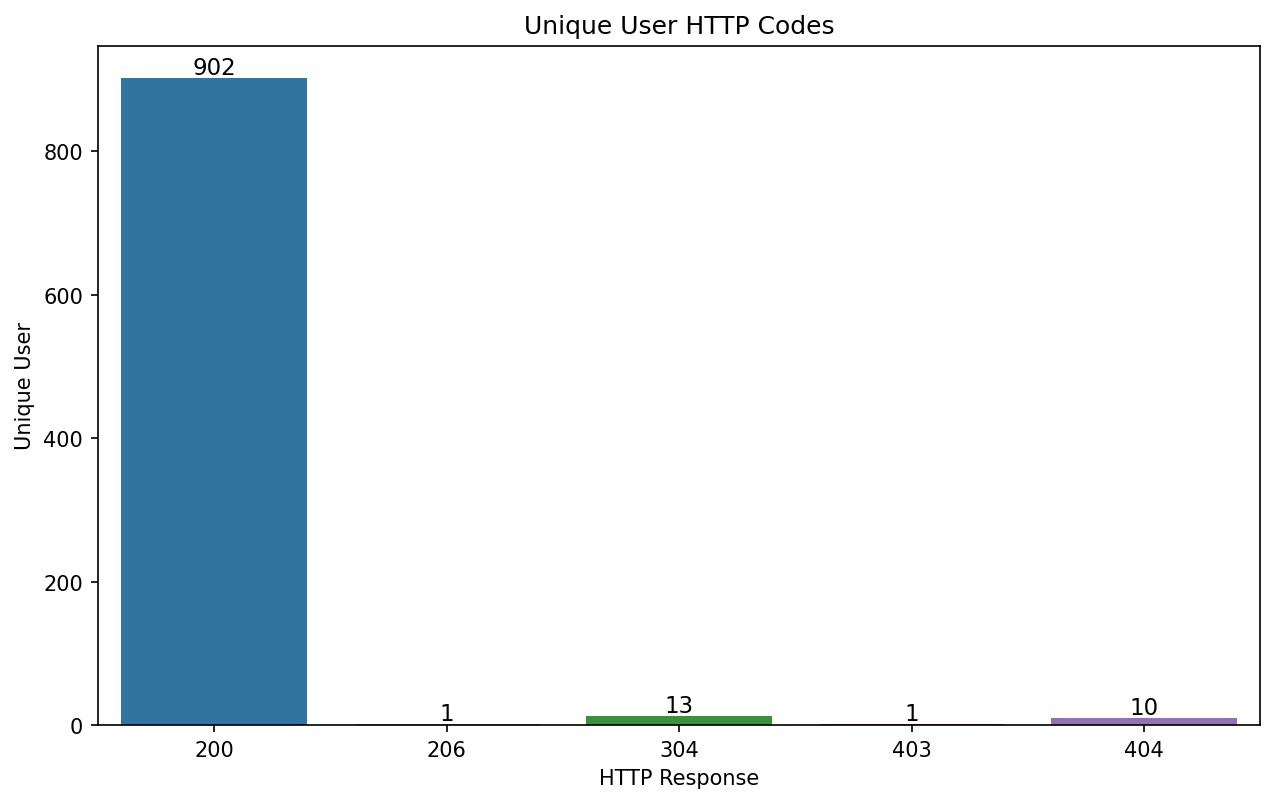

In [23]:
plt.figure(figsize=(10,6),dpi=150)
sns.countplot(data=unique_once_df, x="response")
plt.title("Unique User HTTP Codes")
plt.xlabel("HTTP Response")
plt.ylabel("Unique User")
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                       textcoords='offset points')
plt.show()

In [24]:
unique_once_df.columns

Index(['time', 'remote_ip', 'request', 'response', 'bytes', 'agent', 'year',
       'month', 'day', 'hour', 'minute', 'request_type', 'product',
       'product_brand', 'product_model', 'product_year'],
      dtype='object')

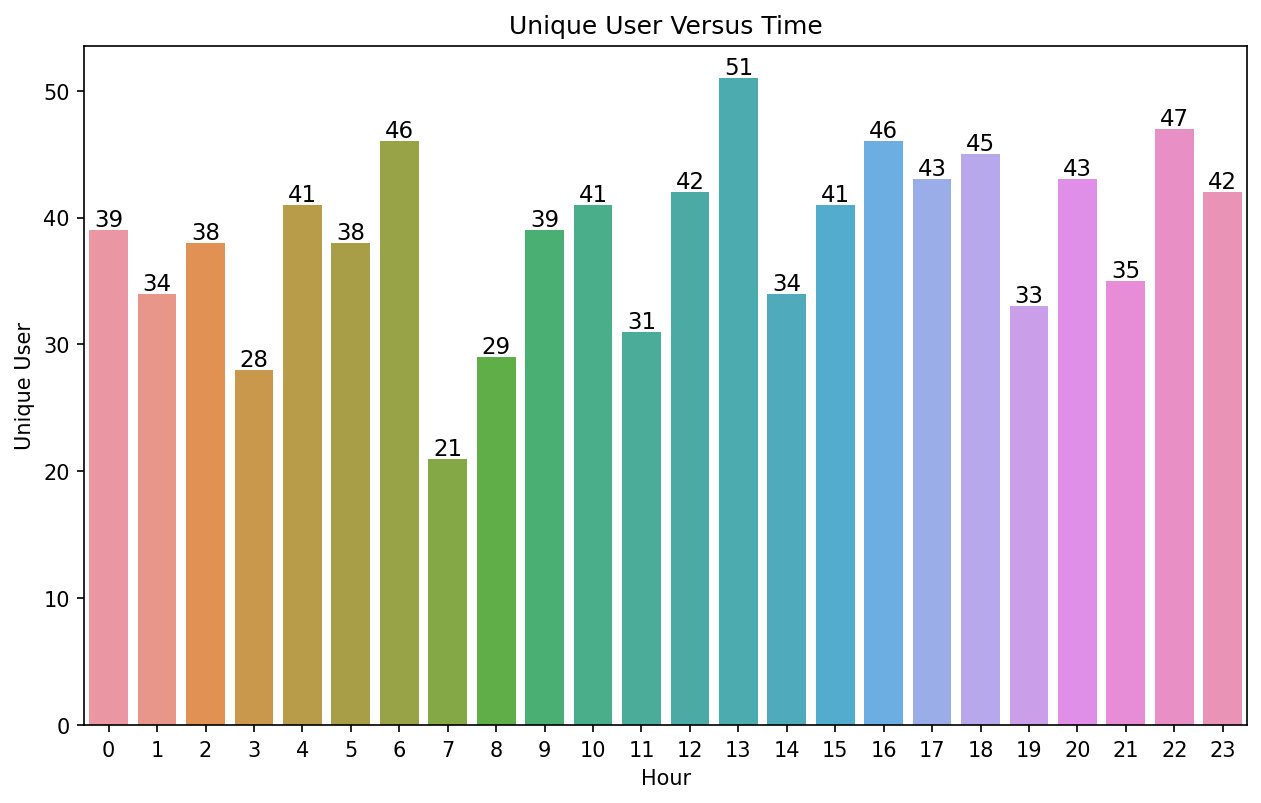

In [25]:
plt.figure(figsize=(10,6),dpi=150)
sns.countplot(x="hour", data=unique_once_df)
plt.title("Unique User Versus Time")
plt.xlabel("Hour")
plt.ylabel("Unique User")
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                       textcoords='offset points')
plt.show()

#### Peak Hours

In [26]:
df1["hour"].value_counts(ascending=False)

20    2209
5     2182
22    2178
15    2178
23    2176
12    2174
13    2170
0     2168
18    2166
1     2163
9     2159
4     2157
14    2151
3     2145
2     2135
10    2131
19    2124
17    2120
16    2119
6     2116
21    2106
11    2102
8     2092
7     2041
Name: hour, dtype: int64

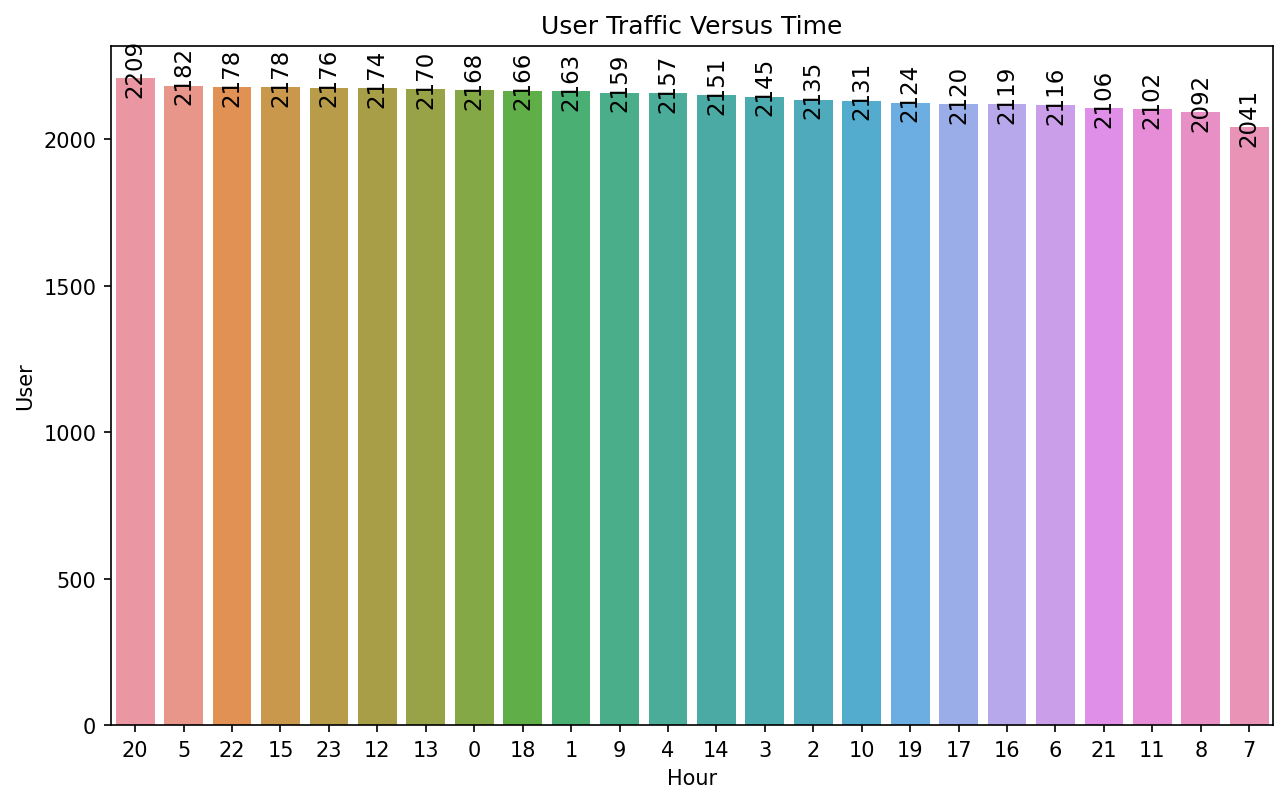

In [27]:
plt.figure(figsize=(10,6),dpi=150)
sorted_values = df['hour'].value_counts().sort_values(ascending=False).index
sns.countplot(x="hour", data=df1, order=sorted_values)
plt.title("User Traffic Versus Time")
plt.xlabel("Hour")
plt.ylabel("User")
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                       textcoords='offset points',rotation=90)
plt.show()

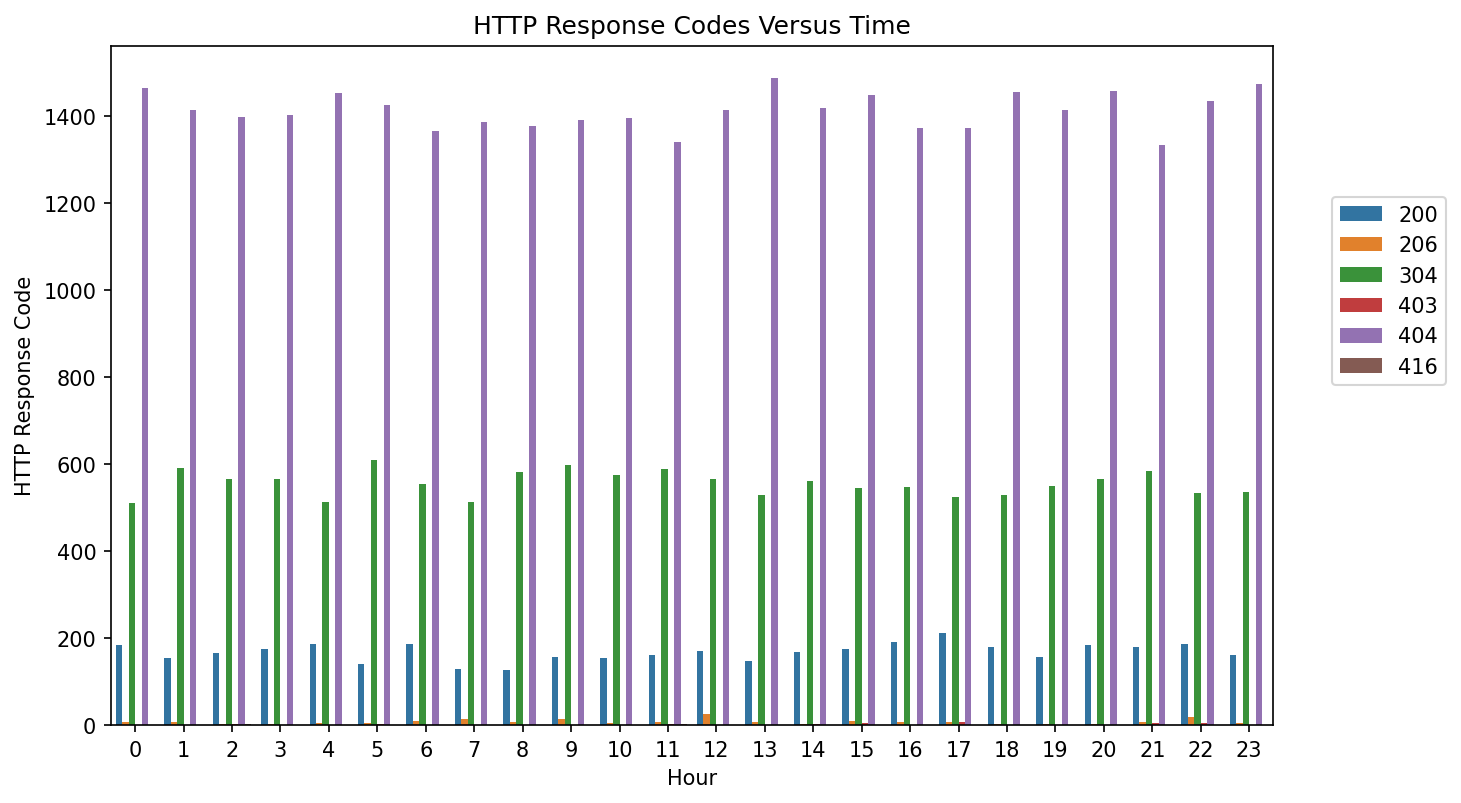

In [28]:
plt.figure(figsize=(10,6),dpi=150)
sns.countplot(x="hour", data=df1, hue="response")
plt.title("HTTP Response Codes Versus Time")
plt.xlabel("Hour")
plt.ylabel("HTTP Response Code")
plt.legend(loc=(1.05,0.5))
plt.show()


#### Successful Route Access Ratio

In [29]:
df3 = df1[df1["response"] == 200]
df3.head()

,time,year,month,day,hour,minute,remote_ip,request_type,product,product_brand,product_model,product_year,response,bytes,agent
3,2015-05-17 08:05:34,2015,5,17,8,5,217.168.17.5,GET,bridgestone-turanza-er300-rft-205-55-r16-91w-2023,bridgestone,turanza-er300-rft-205-55-r16-91w-2023,2023,200,490,Debian APT-HTTP/1.3 (0.8.10.3)
4,2015-05-17 08:05:09,2015,5,17,8,5,217.168.17.5,GET,pirelli-scorpion-sealinside-ao-235-45-r21-101t...,pirelli,scorpion-sealinside-ao-235-45-r21-101t-xl-elec...,2022,200,490,Debian APT-HTTP/1.3 (0.8.10.3)
10,2015-05-17 08:05:12,2015,5,17,8,5,217.168.17.5,GET,pirelli-cinturato-p7-all-season-nf0-285-40-r20...,pirelli,cinturato-p7-all-season-nf0-285-40-r20-108h-xl...,2023,200,3316,-
21,2015-05-17 08:05:06,2015,5,17,8,5,62.75.198.179,GET,pirelli-cinturato-p7-all-season-nf0-285-40-r20...,pirelli,cinturato-p7-all-season-nf0-285-40-r20-108h-xl...,2023,200,490,Debian APT-HTTP/1.3 (0.9.7.9)
28,2015-05-17 08:05:25,2015,5,17,8,5,217.168.17.5,GET,michelin-alpin-5-zp-n0-295-45-r19-109v-xl-2023,michelin,alpin-5-zp-n0-295-45-r19-109v-xl-2023,2023,200,3301,-


In [30]:
df4 = df3.groupby(["product_brand","product_model"])[["response"]].count().reset_index()
df4["ratio"] = df4["response"]/sum(df4["response"])

In [31]:
df5 = df4.sort_values(by="ratio", ascending=False).reset_index(drop=True).head(10)
df5

,product_brand,product_model,response,ratio
0,michelin,alpin-5-rft-n0-205-55-r16-91v-2023,285,0.070755
1,bridgestone,potenza-sport--rft-235-35-r19-91y-xl-2022,281,0.069762
2,gislaved,ultra-speed-2-215-55-r17-98w-xl-2023,266,0.066038
3,kumho,ecsta-ps71-215-45-zr18-93y-xl-2022,259,0.064300
4,michelin,alpin-5-zp-n0-225-45-r17-91v-xl-2023,258,0.064052
5,bridgestone,turanza-er300-275-45-r19-109w-2023,257,0.063803
6,pirelli,cinturato-p7-all-season-nf0-285-40-r20-108h-xl...,255,0.063307
7,hankook,kinergy-4s-h740-205-55-r16-94v-xl-2023,251,0.062314
8,bridgestone,weather-control-a005-evo-225-45-r17-94w-xl-m-p...,249,0.061817
9,hankook,kinergy-eco2-k435-185-65-r15-88h-2022,248,0.061569


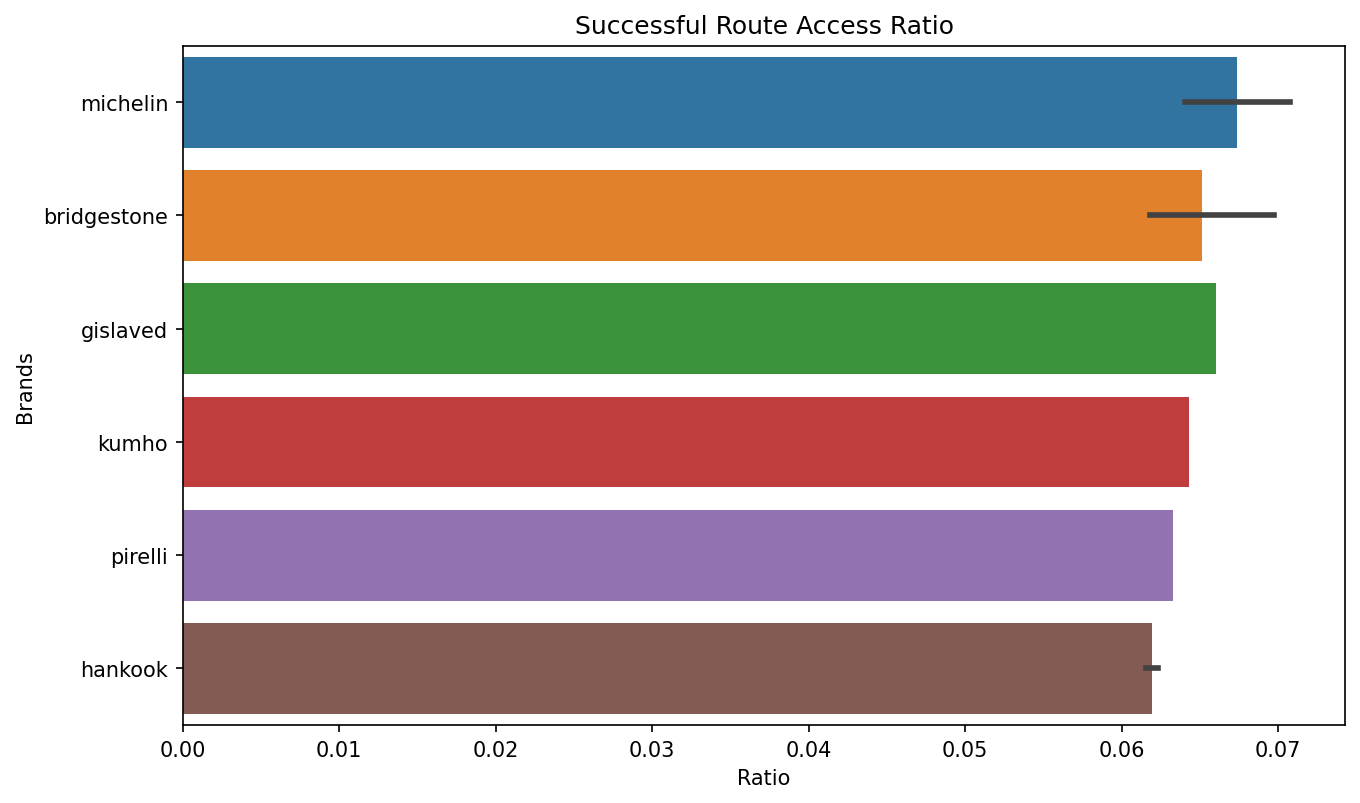

In [32]:
plt.figure(figsize=(10,6),dpi=150) 
sns.barplot(x="ratio", y="product_brand", data=df5)
plt.title("Successful Route Access Ratio")
plt.ylabel("Brands")
plt.xlabel("Ratio")
plt.show()